머신러닝1     
서브웨이 메뉴 영양정보와 판매량 데이터이다.
- m1_nutrition : 빵,메뉴,치즈,소스의 영양정보(탄단지), 메뉴별 가격     
- m1_orders : 주문정보
    - Menu	: 주문 메뉴 (주 고기명)
    - Details	: 기타 재료 
    - Extras    : 추가 재료

머신러닝 1-1     
아래 기준으로 데이터를 전처리하라      
1. 각 주문별 총 열량, 총 주문 금액을 계산하라
2. 총 열량의 경우, 아래의 기준으로 작업한다.
- 탄수화물(Carbohydrates) : 4kcal/g
- 단백질(Protein) : 4kcal/g
- 지방(Fat) : 9kcal/g
3. 총 주문 금액은 Menu명 기준의 가격과 추가된 주 고기(Menu)에 대해서만 추가 부과한다.




```python
# 참고
# dictionary와 list가 value로 string으로 들어가 있는 경우 처리
df[col] = df[col].map(eval)

```

In [60]:
import pandas as pd


df = pd.read_csv('m1_orders.csv')
nu = pd.read_csv('m1_nutrition.csv')

display(df.head())
nu.head()

,OrderId,OrderTime,Menu,Details,Extras
0,e83ee5f7-ffbb-4b20-a264-596d5d83da64,2022-01-12 18:47:50,Veggie Delite,"{""Bread"": ""White"", ""Cheese"": ""Shredded Cheese""...",NaN
1,e257f68e-7953-4ca3-9d0d-6a4d2f0721d7,2022-12-01 10:24:57,Roast Chicken,"{""Bread"": ""Hearty Italian"", ""Cheese"": ""America...",NaN
2,4ac3066d-cf63-42cc-9065-df97c88101b6,2023-11-23 19:02:26,Pulled Pork,"{""Bread"": ""Flatbread"", ""Cheese"": ""American Che...",NaN
3,fbae0b6b-0fb7-43bf-9bc3-ec73a996fd4e,2022-11-01 12:57:53,Ham,"{""Bread"": ""White"", ""Cheese"": ""None"", ""Sauces"":...",NaN
4,15946365-9e9b-44ee-8a42-8c14703d8df5,2022-06-03 19:27:23,Shrimp,"{""Bread"": ""Wheat"", ""Cheese"": ""Mozzarella"", ""Sa...",NaN


,Category,Item,Carbohydrates(g),Protein(g),Fat(g),price
0,Bread,Wheat,36.0,8.4,2.0,NaN
1,Bread,Honey Oat,44.0,8.0,3.0,NaN
2,Bread,Hearty Italian,40.0,7.0,2.5,NaN
3,Bread,Parmesan Oregano,39.0,7.5,2.5,NaN
4,Bread,White,38.0,7.0,2.0,NaN


,OrderId,OrderTime,cal,price
0,e83ee5f7-ffbb-4b20-a264-596d5d83da64,2022-01-12 18:47:50,550.7,5.29
1,e257f68e-7953-4ca3-9d0d-6a4d2f0721d7,2022-12-01 10:24:57,519.7,6.79
2,4ac3066d-cf63-42cc-9065-df97c88101b6,2023-11-23 19:02:26,655.7,6.79
3,fbae0b6b-0fb7-43bf-9bc3-ec73a996fd4e,2022-11-01 12:57:53,431.2,5.70
4,15946365-9e9b-44ee-8a42-8c14703d8df5,2022-06-03 19:27:23,502.8,6.49


머신러닝 1-2    
위 데이터를 기준으로 EDA를 진행하라 (시각화 포함, 시계열 정보 반영)

<Axes: title={'center': 'monthly sales'}, xlabel='OrderTime'>

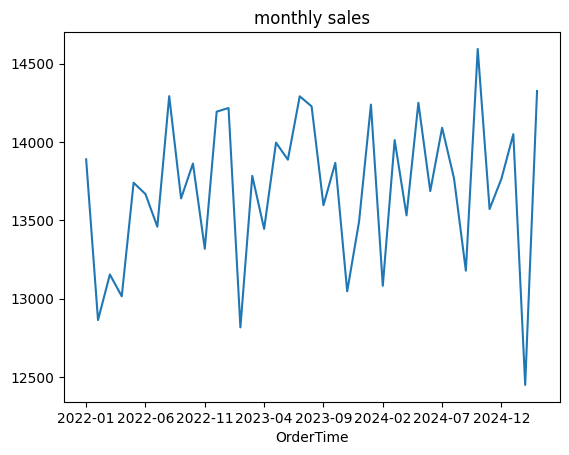

머신러닝 1-3        
일별 오전까지의 매출을 통해 오후의 매출을 예측하는 모델링을 진행하려한다.(오전 ~14:00 미만, 오후 : 14:00 이상 24:00미만)     
아래의 기준으로 모델링을 위한 전처리를 시행하라       

1. date 컬럼을 추가하여 일자 데이터를 생성한다.
2. 오후 기간 동안의 매출액 합계를 종속변수(y)로 추가한다.
3. 오전 기간 동안의 데이터로 독립변수를 구성한다.
- 파생변수를 6개 이상 만들고 각 의미를 설명하라
- 오후 판매 데이터는 사용하지 않는다

In [ ]:
'''
아래 6개 파생변수를 생성한다.
1. 오전 기간동안 판매한 상품의 총 수
2. 오전 기간동안 판매한 상품의 총 가격
3. 주말 여부
4. 오전 기간동안 추가 주문한 상품의 수
5. 오전 기간동안 가장 많이 주문된 단품 제품의 수
6. 오전 기간동안 가장 많이 주문된 시간
'''

,OrderTime,sales_count,price,weekend_check,Extras_counts,Menu,hour,y
0,2022-01-01,23,144.26,1,0,5,11,272.92
1,2022-01-02,17,103.73,1,0,4,11,130.34
2,2022-01-03,30,198.57,0,3,5,13,306.25
3,2022-01-04,22,144.90,0,1,6,11,262.53
4,2022-01-05,25,172.15,0,3,4,13,332.70
...,...,...,...,...,...,...,...,...
1181,2025-03-27,27,177.83,0,1,8,12,318.15
1182,2025-03-28,37,242.07,0,1,8,12,389.69
1183,2025-03-29,22,144.05,1,2,5,11,156.44
1184,2025-03-30,23,158.77,1,2,4,12,176.43


머신러닝 1-4    
회귀 모델 학습을 진행하라.     

Lasso, svm, tree 계열 모델 3가지로 학습하고 결과 분석
rmse를 평가지표로 한다.    
grid search 진행

test : 홀수 달의 18일 까지의 데이터    
train : 그것을 제외한 모든 데이터

,OrderTime,sales_count,price,weekend_check,Extras_counts,Menu,hour,y,type
0,2022-01-01,23,144.26,1,0,5,11,272.92,test
1,2022-01-02,17,103.73,1,0,4,11,130.34,test
2,2022-01-03,30,198.57,0,3,5,13,306.25,test
3,2022-01-04,22,144.90,0,1,6,11,262.53,test
4,2022-01-05,25,172.15,0,3,4,13,332.70,test
...,...,...,...,...,...,...,...,...,...
1181,2025-03-27,27,177.83,0,1,8,12,318.15,train
1182,2025-03-28,37,242.07,0,1,8,12,389.69,train
1183,2025-03-29,22,144.05,1,2,5,11,156.44,train
1184,2025-03-30,23,158.77,1,2,4,12,176.43,train


통계1

한 고등학교의 수학 시험 점수는 평균 75점, 표준편차 8점인 정규분포를 따릅니다.
1. 80점 이상 받을 확률은?
2. 상위 10% 학생의 최소 점수는?

한 공장에서 생산된 전구의 불량률은 4% (p=0.04)입니다. 50개를 무작위로 검사합니다.

1. 정확히 3개가 불량일 확률은?
2. 5개 이상 불량일 확률은?

한 커피숍에서 1시간 동안 평균 6건의 주문(λ=6)이 발생한다고 가정합니다.    
1. 정확히 8건의 주문이 발생할 확률은?
2. 4건 이하의 주문이 발생할 확률은?

한 은행 창구에서 고객이 평균 12분마다 도착한다고 가정합니다.
1. 다음 고객이 10분 이내에 도착할 확률은?
2. 다음 고객이 20분 이상 걸릴 확률은?

한 웹사이트의 광고 클릭률은 베타분포(α=15, β=85)를 따른다고 가정합니다 (평균 클릭률 ≈ 0.15)    
1. 클릭률이 0.2 이상일 확률은?
2. 클릭률의 95% 신뢰구간(하위 2.5%, 상위 2.5%)은?

클릭률 0.2 이상 확률: 0.0877
95% 신뢰구간: (0.0874, 0.2259)


한 병원에서 환자 4명을 진료하는 데 걸리는 시간이 감마분포(k=4, θ=5분)를 따른다고 가정합니다 (평균 20분).    
1. 진료 시간이 15분 이내일 확률은?
2. 진료 시간이 30분 이상일 확률은?